<span style="font-size: 18px;"><b> Financial Success Forecasting Mechanism for Computer Games (Based on Open Data). </span></b>

## Project description.
Project based on open-source data for internet-shop specializing in the global distribution of computer games.

**Goal:** Develop a mechanism that can identify potentially successful gaming products.

**Data Overview:**

`Name` — the name of the game   
`Platform` — the gaming platform  
`Year_of_Release` — the release year of the game  
`Genre` — the genre of the game  
`NA_sales` — sales in North America (in millions of copies)  
`EU_sales` — sales in Europe (millions of copies)  
`JP_sales` — sales in Japan (millions of copies)
`Other_sales` — sales in other countries (millions of copies)   
`Critic_Score` — critics' score (maximum score of 100)  
`User_Score` — users' score (maximum score of 10)  
`Rating` — ESRB rating (age rating for computer games)

The data for 2016 may be incomplete.

**Project includes** the following key phases:

- Data Exploration and Preprocessing.
- Exploratory Data Analysis.
- Data Preparation for Hypothesis Testing.
- Hypothesis Testing with Statistical Methods.

Through these phases, the project aims to provide actionable insights that can guide internet shop in optimizing its product offerings and improving its financial success.

## Data Import


### Importing libraries, configuring the environment.

In [54]:
import pandas as pd
import numpy as np

import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [55]:
#format of decimal numbers in tables
pd.set_option('display.float_format', '{:.2f}'.format)

#resetting column number restrictions
pd.set_option('display.max_columns', None)

#higher quality plots resolution
%config InlineBackend.figure_format = 'retina'

#hiding warnings
import warnings
warnings.filterwarnings("ignore")

### Importing data.

In [56]:
url = '.../games.csv'
data = pd.read_csv(url)
data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5581,Dead Rising 2: Off the Record,PS3,2011.00,Action,0.11,0.08,0.10,0.03,72.00,7.1,M
3465,Gex: Enter the Gecko,PS,1998.00,Platform,0.32,0.22,0.00,0.04,NaN,NaN,NaN
7119,New Carnival Games,DS,2010.00,Misc,0.16,0.05,0.00,0.02,NaN,tbd,E
8293,.hack//G.U. Vol.3//Redemption,PS2,2007.00,Role-Playing,0.00,0.00,0.17,0.00,NaN,NaN,NaN
9978,ASH: Archaic Sealed Heat,DS,2007.00,Role-Playing,0.00,0.00,0.12,0.00,NaN,NaN,E10+


In [57]:
data.shape

(16715, 11)

In [58]:
data['Name'].nunique()

11559

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### **Data Description**

- The dataset contains **16715** records of **11559** unique games with descriptions of parameters, sales figures, and ratings.
- There are missing values in columns `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, and `Rating`.
- Some column data types may not be ideal.

**Next steps:**

- Rename columns to more convenient names.
- Check for duplicates and anomalies.
- If possible, fill or remove missing values.
- Adjust data types for convenience.

## Data preprocessing.

### Renaming columns.

In [60]:
data.columns = data.columns.str.lower()

### Fixing dtypes.
Why object type for `user_score`.

In [61]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd - placeholder for situations when there is no score yet.  
Checking how many of those we have.

In [62]:
data.query('user_score == "tbd"')['user_score'].count()

2424

A lot. We actually have 2424 more NaN in user_score.  
To avoid confusion, let's replace these values with NaN, which will also enable us to change the data type of the columns to a more suitable one.

In [63]:
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan
data['user_score'] = data ['user_score'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


For future: if we manage to fill in the empty values in `year_of_release`, it would be a good idea to change the data type to an integer afterward.

### Fixing missing values.


####  Name
Let's see why whe have 5+ thousand games with the duplicated names.

In [64]:
# lowering just in case
data['name'] = data['name'].str.lower()

# selecting all games that appear in DataFrame more than once
dup_names = data.groupby('name').filter(lambda x: len(x) > 1)['name'].unique()

# taking closer look
data.query('name in @dup_names').sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3862,frozen: olaf's quest,DS,2013.00,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
3358,frozen: olaf's quest,3DS,2013.00,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
3120,007: quantum of solace,Wii,2008.00,Action,0.29,0.28,0.01,0.07,54.00,7.50,T
1785,007: quantum of solace,PS3,2008.00,Action,0.43,0.51,0.02,0.19,65.00,6.60,T
1285,007: quantum of solace,X360,2008.00,Action,0.82,0.51,0.01,0.14,65.00,7.10,T
...,...,...,...,...,...,...,...,...,...,...,...
3516,zumba fitness,PS3,2010.00,Sports,0.28,0.21,0.00,0.08,NaN,3.80,E
13172,zumba fitness core,X360,2012.00,Misc,0.00,0.05,0.00,0.00,77.00,6.70,E10+
12439,zumba fitness core,Wii,2012.00,Misc,0.00,0.06,0.00,0.01,NaN,NaN,E10+
7137,zumba fitness: world party,Wii,2013.00,Misc,0.11,0.10,0.00,0.02,NaN,NaN,E


It appears that these are not duplicates but important data representing the same games available on different platforms.

#### Genre
Verifying that the games for which we don't know the genre are the same as those without names, and then removing them.

In [65]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [66]:
data = data.query('~name.isna()')

####  Year_of_release
Let's see how many NaN exactly we have in `year_of_release` column.

In [67]:
data['year_of_release'].isna().sum()

269

Not so many, removing.

In [68]:
data.dropna(subset=['year_of_release'], inplace=True)

Changing to convenient dtype. We have years here, so int16 will be enough.

In [69]:
data['year_of_release'] = data['year_of_release'].astype('int16')

#### `critic_score`, `user_score`, `rating`
 Let's leave the missing values as they are.  
 In theory, the `rating` could potentially be filled in with information from the same game on other platforms, but there's uncertainty about whether this approach would work consistently (as different platforms might use different ratings for the same game). So, as a precaution, we won't attempt to fill these missing values.

### Checking for duplicates.

In [70]:
data.duplicated().sum()

0

No obvious duplicates.  
Let's check if there are any hidden ones.

In [71]:
data[['name', 'platform', 'year_of_release']].duplicated().sum()

1

In [72]:
data[data[['name', 'platform', 'year_of_release']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,madden nfl 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.00,5.50,E


In [73]:
data.query('name == "madden nfl 13" and platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.00,5.50,E
16230,madden nfl 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.00,5.50,E


In [74]:
data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], inplace=True)

### Creating new column with total sales.

In [75]:
data['total_sales'] = data.loc[:, data.columns.str.endswith('_sales')].sum(axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int16  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int16(1), object(4)
memory usage: 1.5+ MB


In [76]:
data[['name', 'platform']].nunique()

name        11426
platform       31
dtype: int64

### Preprocessing Summary

- Corrected column names.
- Changed data types of columns:
  - `user_score` to float (replaced 'tbd' values with NaN).
  - `year_of_release` to int16.
- Removed 2 rows with unknown games of an unknown genre.
- Removed 269 rows with empty values in the `year_of_release` column.
- Retained missing values in the `critic_score`, `user_score`, and `rating` columns.
- Created a new column for total sales for each game on a specific platform.
- Identified and removed 1 duplicate (seemed to be a minor technical glitch).

**For further analysis we have:** 16443 records with information about 11426 games across 31 platforms.

**Next Steps:** Determine the time period where the data should be considered relevant for analysis.

## Exploratory analysis



Amount of released games by separate platforms in time.

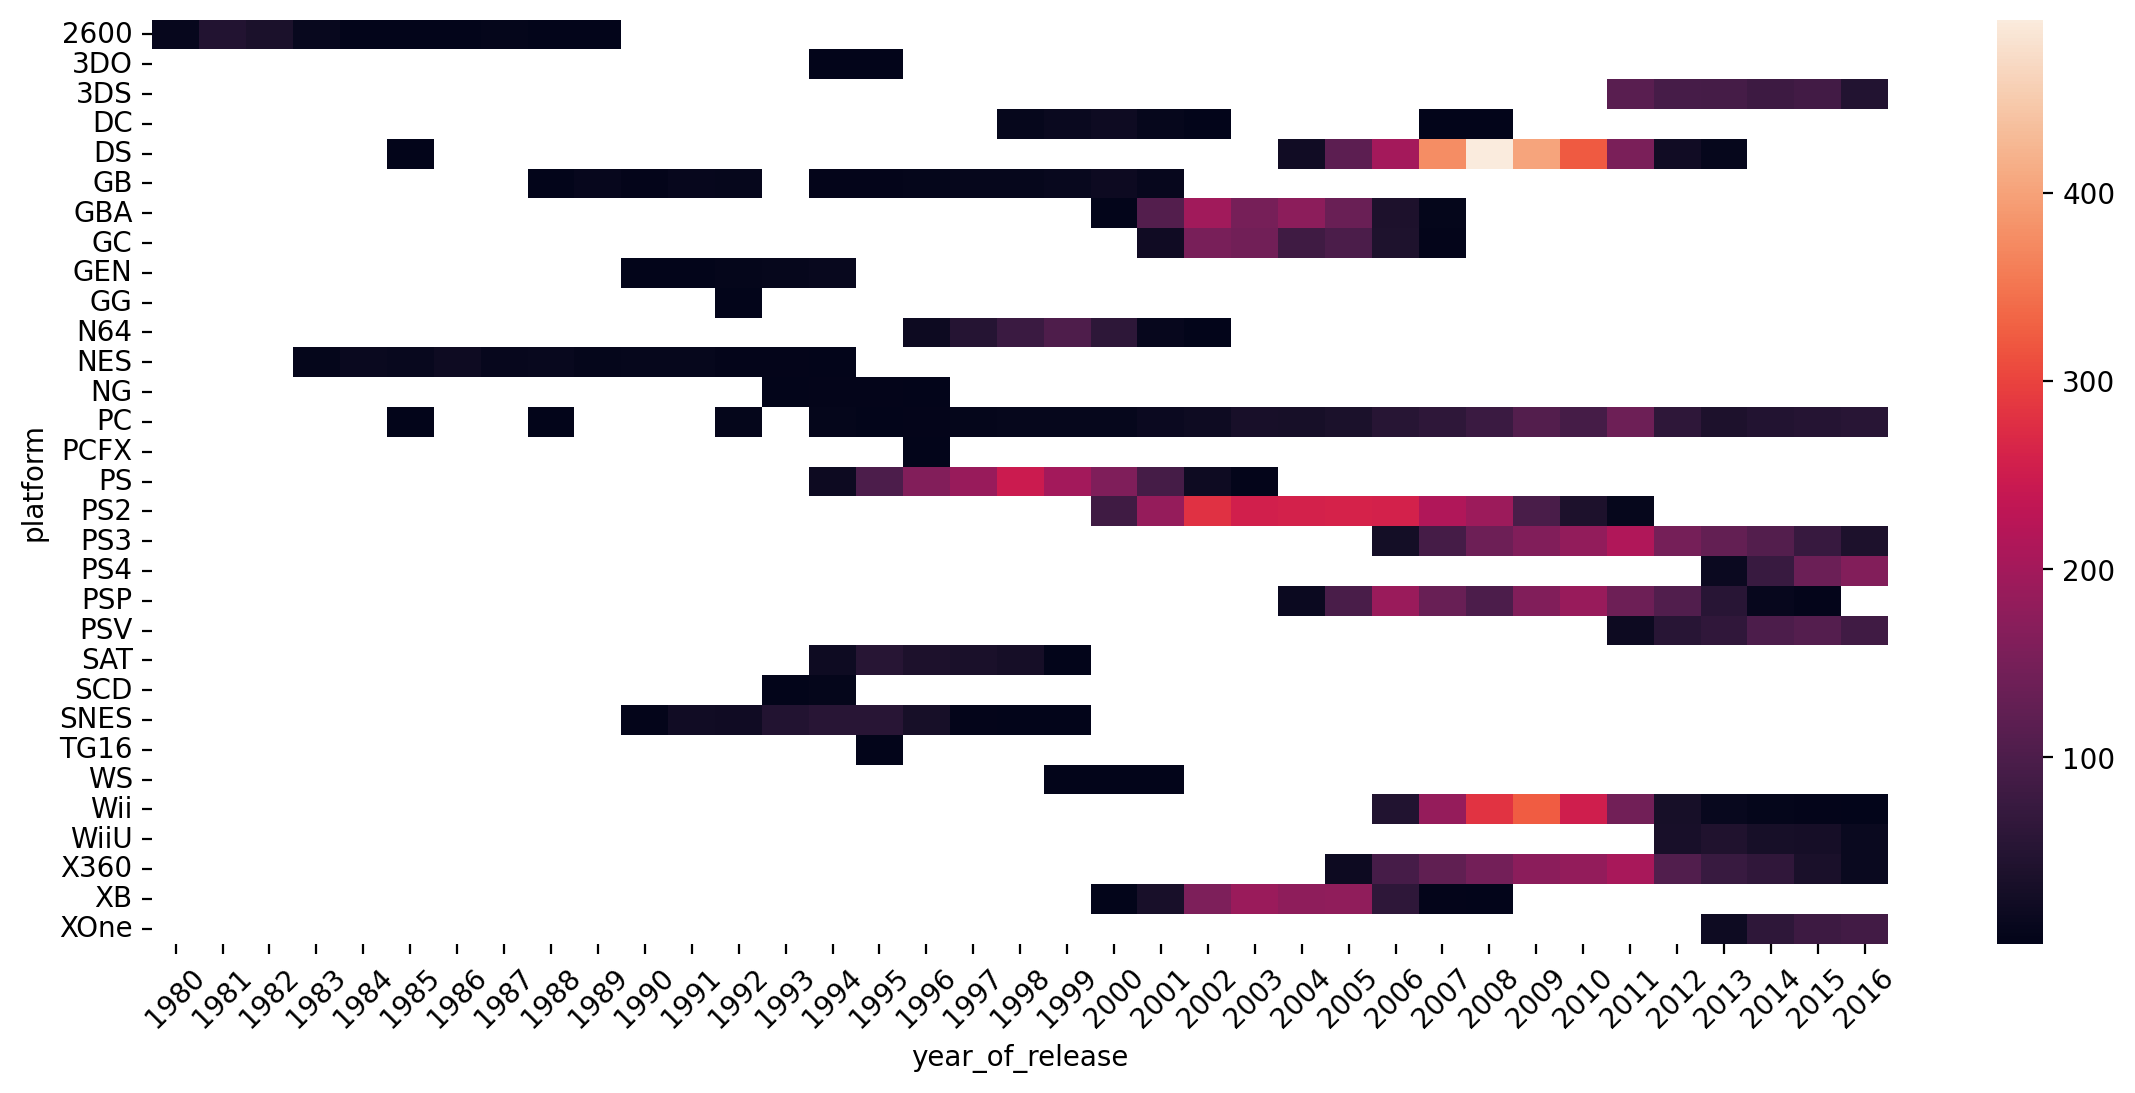

In [77]:
def platmap(data):
    plt.figure(figsize=(14,6))
    sns.heatmap(data.pivot_table(index='platform'
                 , columns='year_of_release'
                 , values='name'
                 , aggfunc='count'))
    plt.xticks(rotation=45);

platmap(data)

The same for platforms with total sales higher than the median, which we consider to be financially successful. And closer to nowadays (starting 2001).

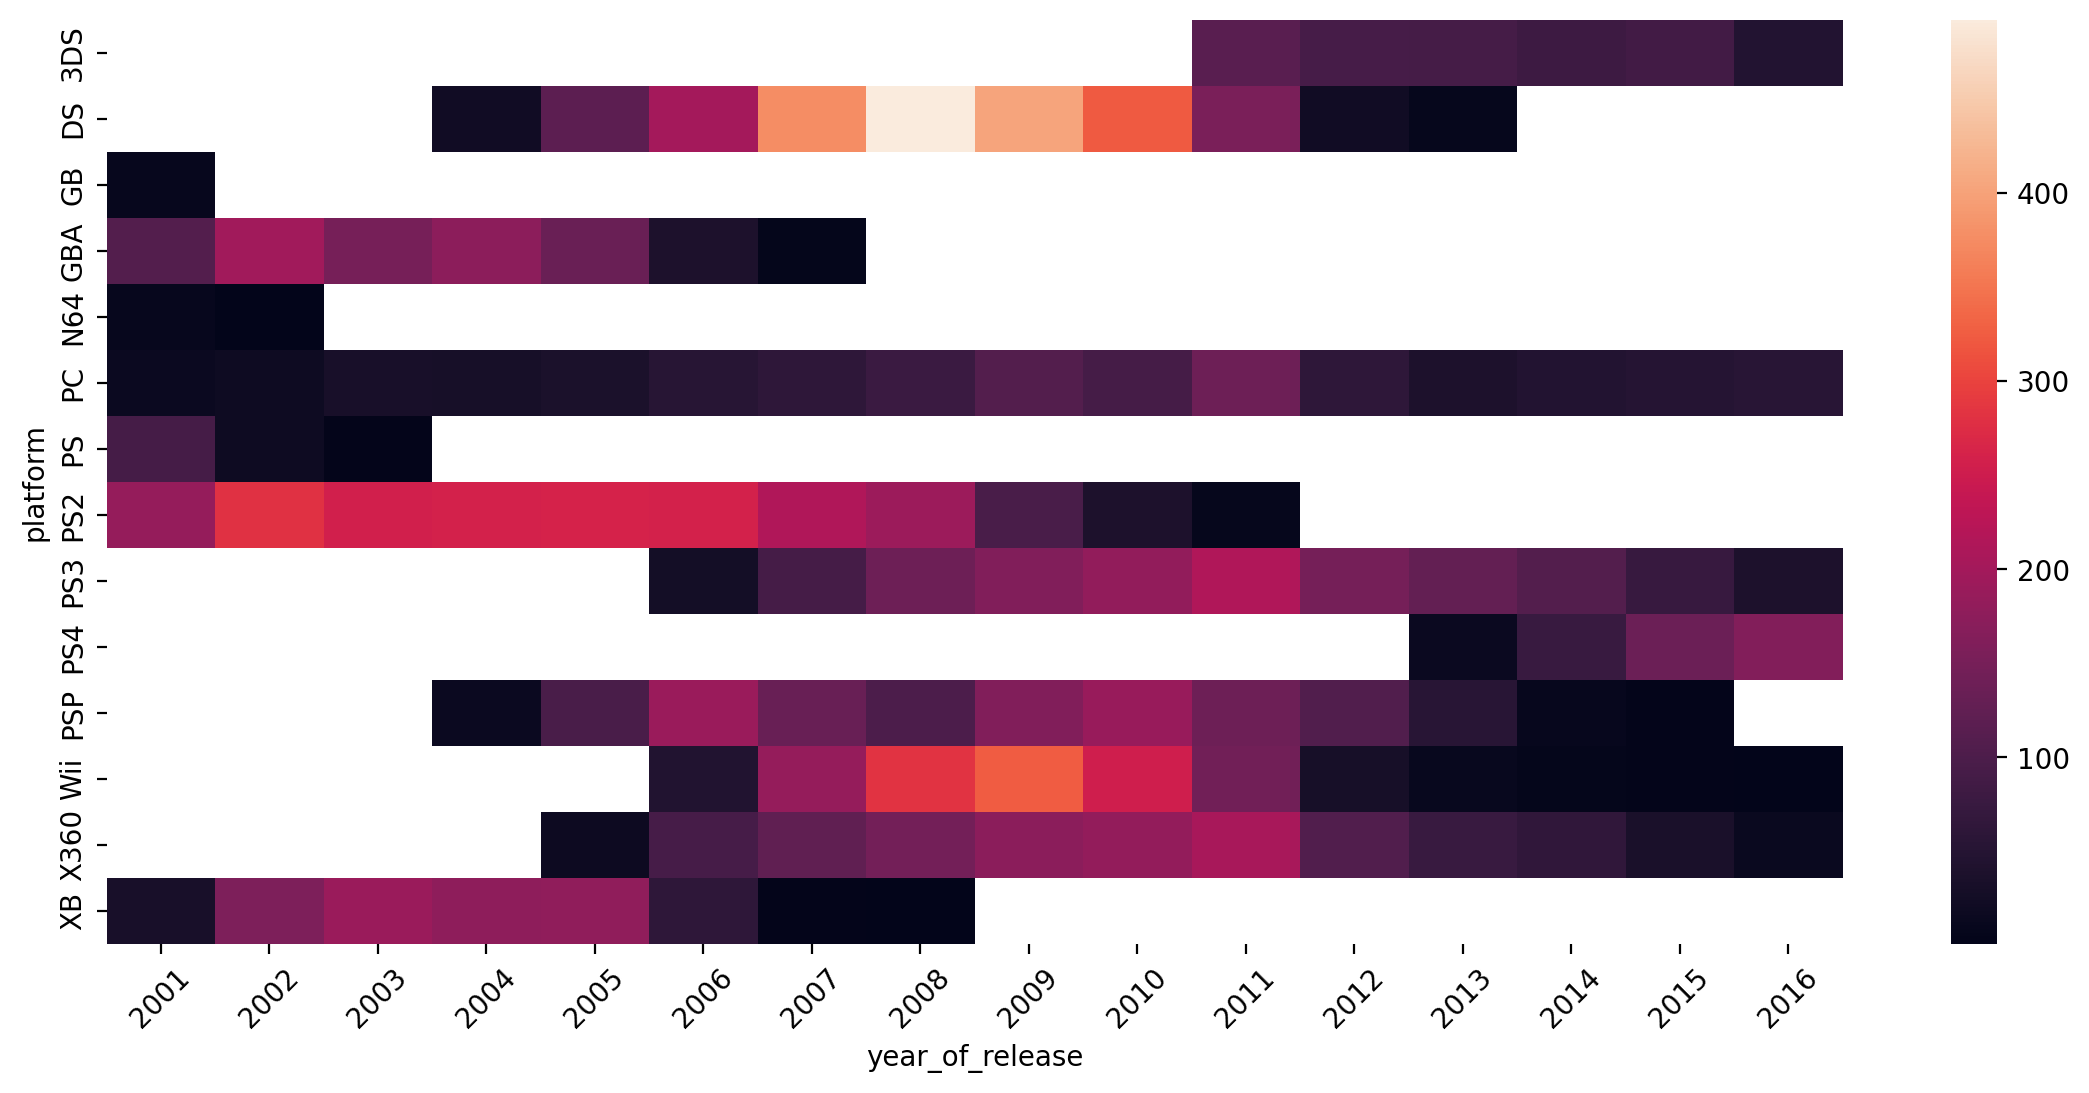

In [78]:
# calculating sales
total_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# taking top half
total_sales = total_sales[total_sales > int(total_sales.median())]

# filtering data to include only top half platforms
top50_sales = data.query('platform in @total_sales.index and year_of_release > 2000')

# plotting the success stories
platmap(top50_sales)

Also let's check the life-cycle for platforms in numbers.

In [79]:
#calculating the lifespan for each platform, examining the main statistics
(
    data.pivot_table(index='platform'
                     , values='year_of_release'
                     , aggfunc=(lambda x: x.max()-x.min()))
).rename(columns={'year_of_release': 'life_cycle'}).describe().T

,count,mean,std,min,25%,50%,75%,max
life_cycle,31.00,7.61,7.00,0.00,3.00,6.00,10.00,31.00


It appears that gaming platforms typically have a lifespan ranging from 3 to 10 years, with a median and mean lifespan of approximately 6 to 8 years. To focus on more recent and relevant data, let's filter the dataset to include only the last 7 years of data. Additionally, we'll remove platforms that have declined more than 2 years ago to ensure we are working with more current information.

In [80]:
#clearing everything older than 7 years
data = data.query('year_of_release > 2009')

#selecting platforms that were not active after 2014
end_of_life = data.groupby('platform')['year_of_release'].max()
declined_platforms = end_of_life[end_of_life < 2015].index.tolist()

#removing them from the dataset
data = data.query('platform not in @declined_platforms')

Let's check how successful was this period for each remaining platform.

In [81]:
#calculating total sales per platform
sales_by_platform = data.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

#building plot
fig = px.area(sales_by_platform
              , x='year_of_release'
              , y='total_sales'
              , color='platform'
              , title="Total sales per platform in time")
fig.update_xaxes(title_text='Year of release')
fig.update_yaxes(title_text='Total_sales')
fig.show()

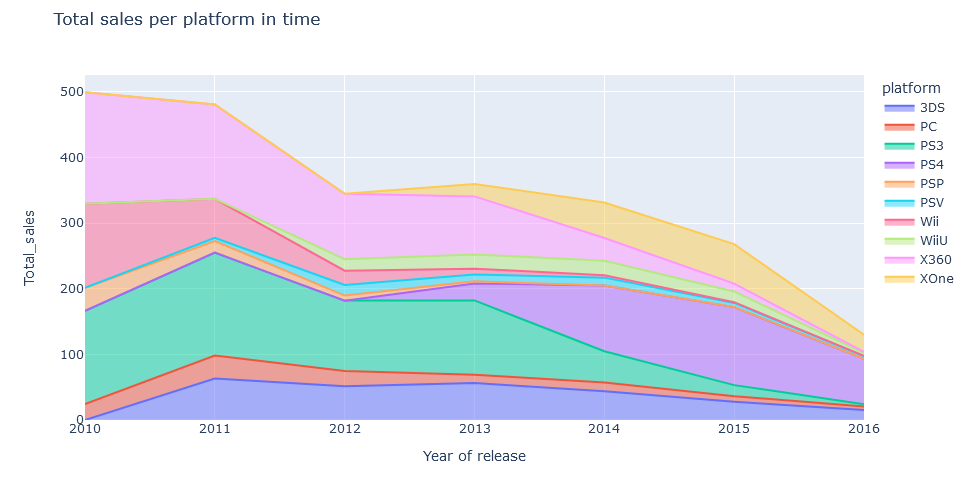

Doesn't look so good.  
As soon as 2016 data may be incomplete, the data for 2015 is more informative to check the dinamics.  
Total sales increased primarily for the PS4 and XOne platforms, with the WiiU also showing some consistancy in sales, though on a smaller scale compared to the leaders. The 3DS, while experiencing a slight decrease in total sales, still seems to be a relevant platform.  
Additionally, the plot illustrates that the former leading platforms were not just going to nowhere but rather were gradually replaced by the next generation, which seems to be a natural process in the gaming industry. So we also need to consider this when defining the potentially successful platform.


As soon as total sales are influenced by the number of released games, let's also check the median sales per game per platform (median instead of average to avoid influence of super-star games). In fact, as a reseller, we are more interested in this metric, as it better shows the performance of individual games on each platform, which is more relevant to us than the success of the platform in general.

In [82]:
#calculating average sales per game per platform
sales_by_platform = data.groupby(['platform', 'year_of_release'])['total_sales'].median().reset_index()

#building plot
fig = px.area(sales_by_platform
              , x='year_of_release'
              , y='total_sales'
              , color='platform'
              , title='Median sales per game per platform in time')
fig.show()

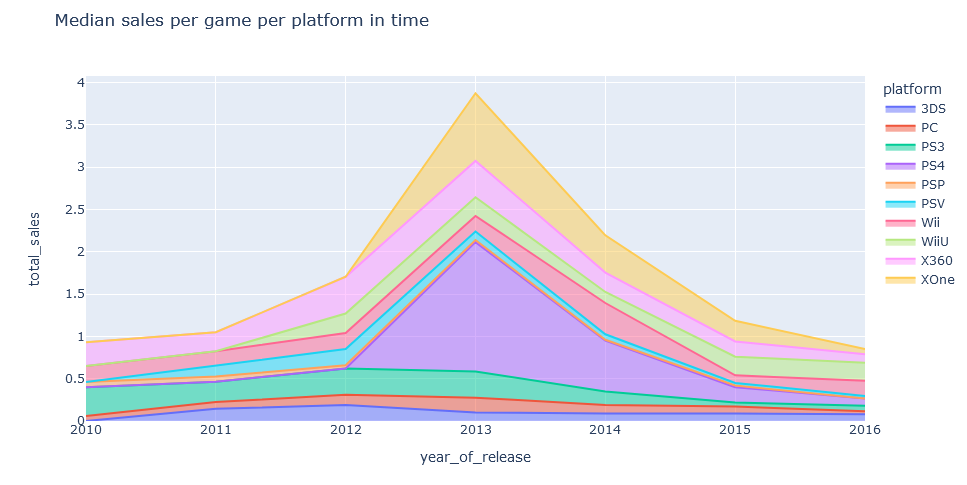

Totally different picture here and the previous generation appears to be in better shape. However, we should keep in mind the general rule: when a new generation of platforms appears, the previous one tends to decline.

In summary, the potentially interesting platforms at the moment, in descending order, are PS4, XOne, WiiU, and 3DS.

Additionally, it's evident from the data that it would be a good idea to exclude the year 2013 from the dataset to ensure it doesn't skew the forecasting analysis with atypical data.

Let's cut the dataset to have the data for the last 3 years only.

In [83]:
data = data.query('year_of_release > 2013')

### Confirming finantially successful platforms on defined time period.
Let's take a look at total sales per game per platform on the period in general.

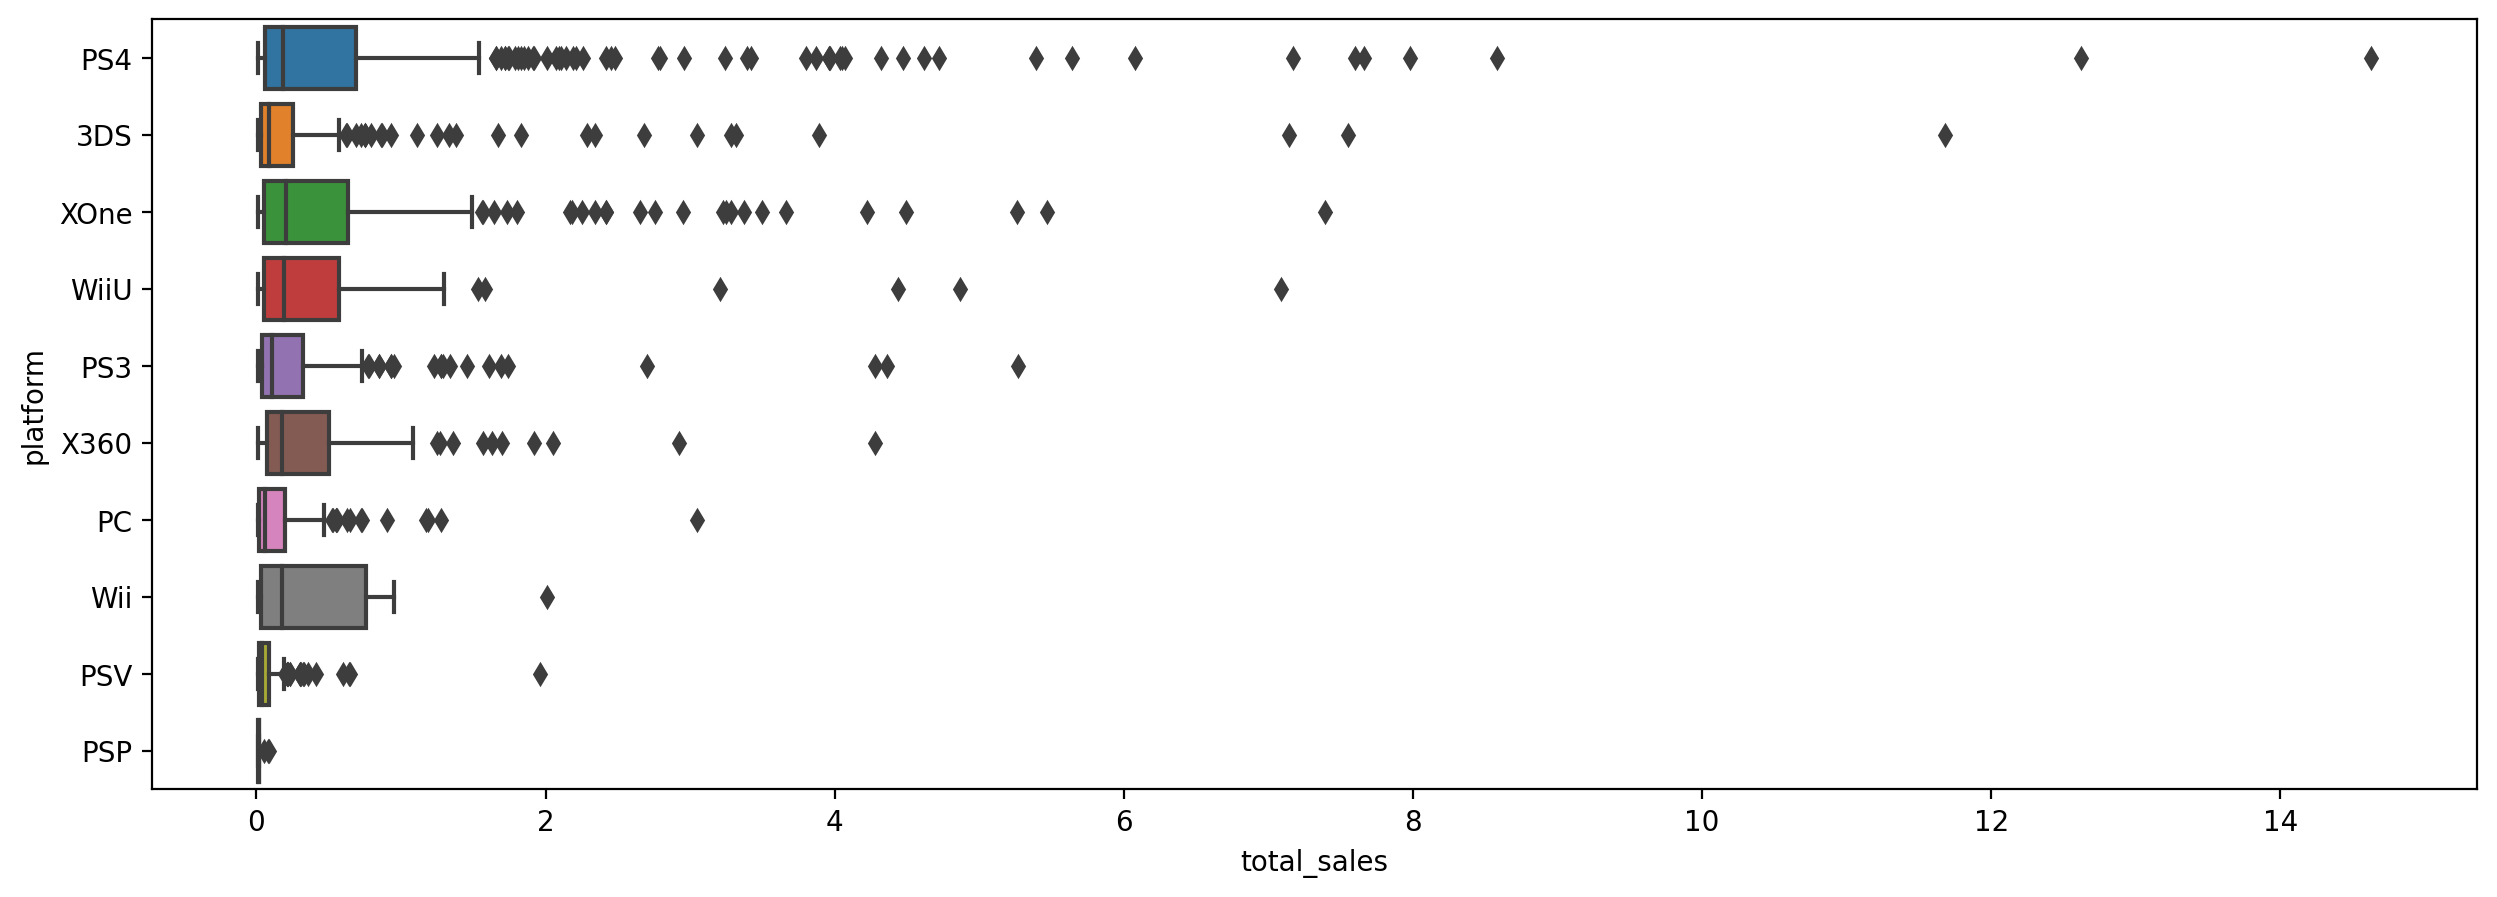

In [84]:
plt.figure(figsize=(15, 5))
sns.boxplot(y='platform'
            , x='total_sales'
            , data=data);

And closer look.

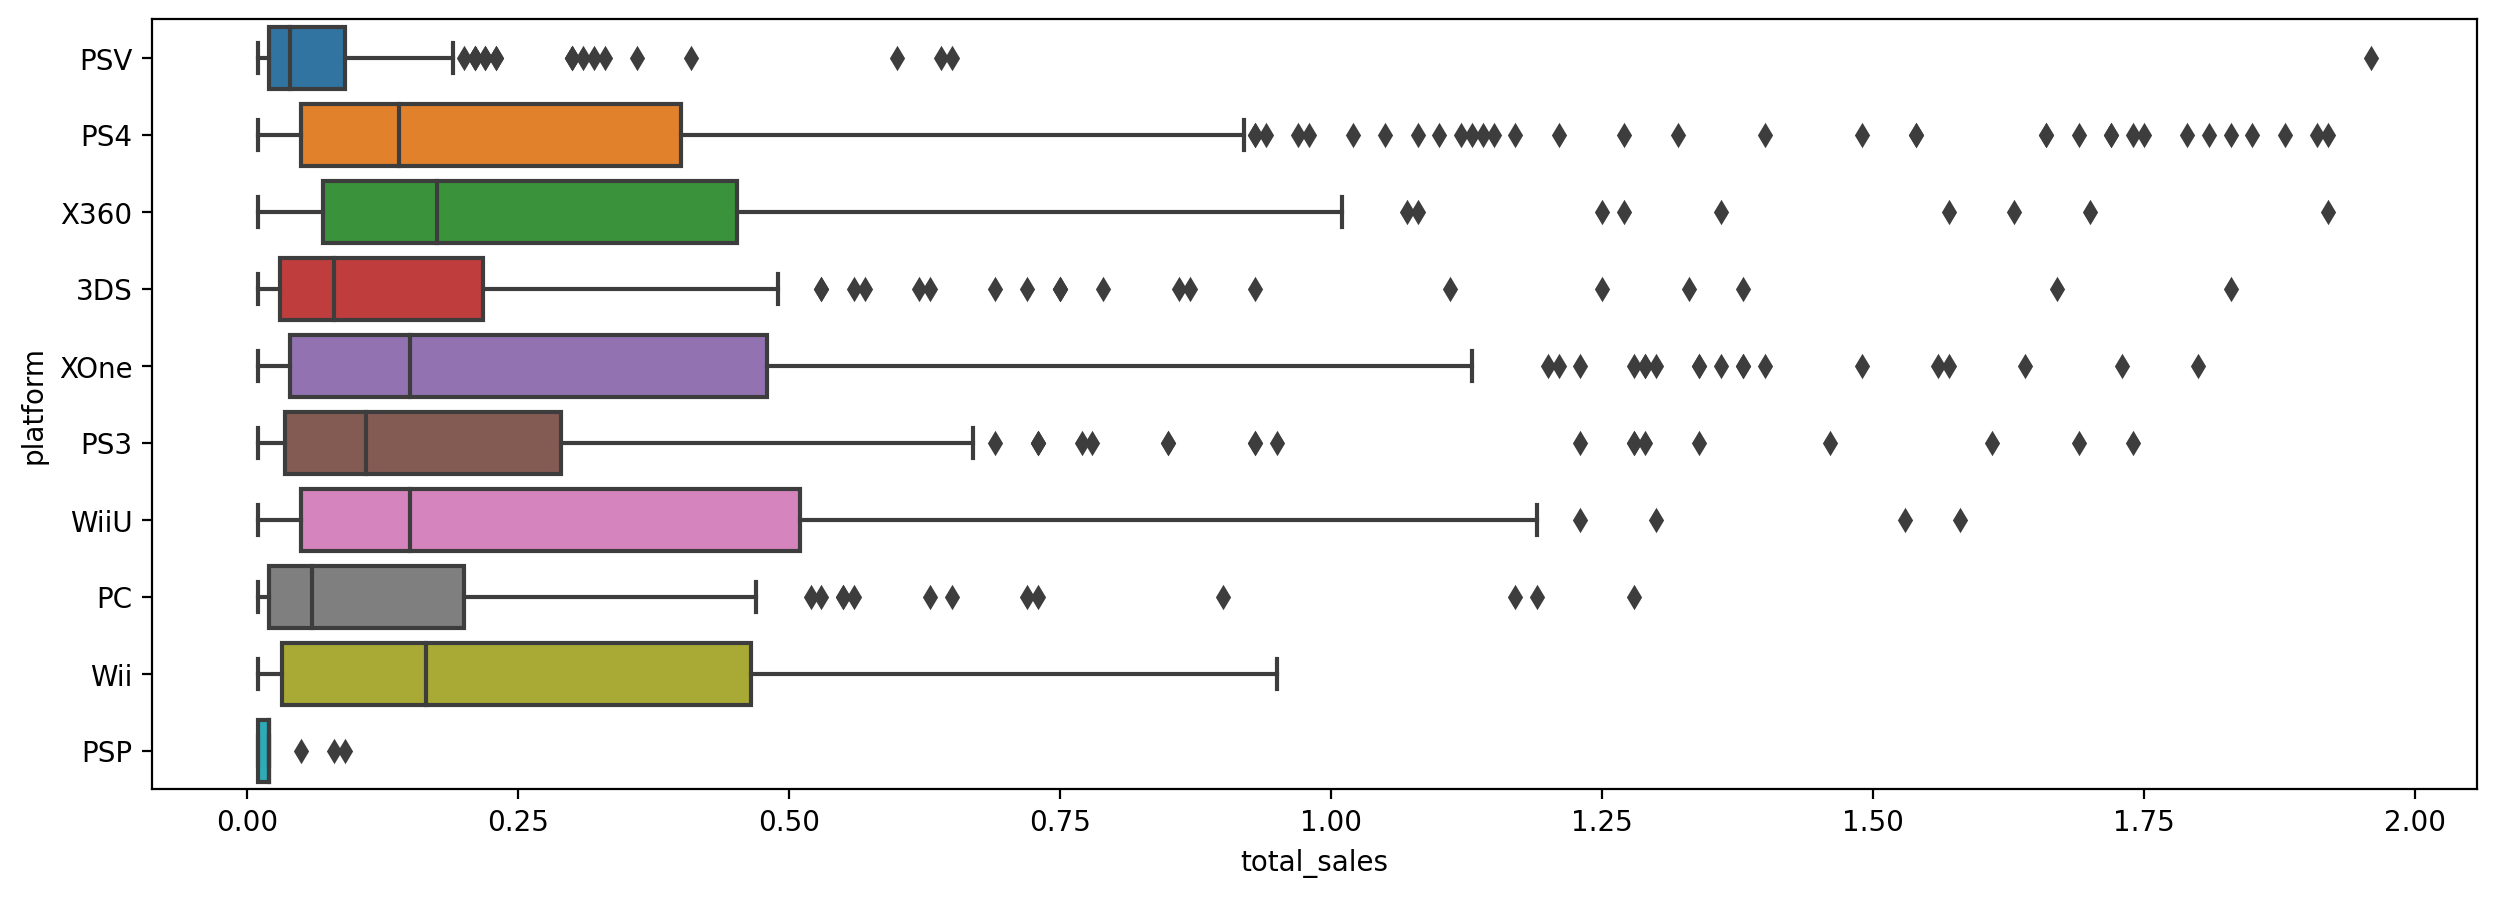

In [85]:
plt.figure(figsize=(15, 5))
sns.boxplot(y='platform'
            , x='total_sales'
            , data=data.query('total_sales < 2'));

The same in numbers.

In [86]:
total_sales = data.groupby('platform')[['total_sales', 'name']] \
                  .agg({'total_sales': 'sum', 'name': 'count'})
total_sales['per_game'] = total_sales['total_sales'] / total_sales['name']
total_sales.sort_values(by='per_game', ascending=False)

,total_sales,name,per_game
platform,,,
PS4,288.15,376,0.77
XOne,140.36,228,0.62
WiiU,42.98,73,0.59
Wii,5.07,11,0.46
X360,48.22,111,0.43
3DS,86.68,212,0.41
PS3,68.18,219,0.31
PC,27.05,151,0.18
PSV,22.40,295,0.08


In summary, the top-performing platforms are clearly PS4, XOne, and Wii U, with Wii and Xbox 360 also showing respectable performance. Additionally, 3DS deserves consideration due to its consistently modest but stable sales over an extended period.

### The impact of user and critic scores on sales
Let's start with one platform and take PS4.

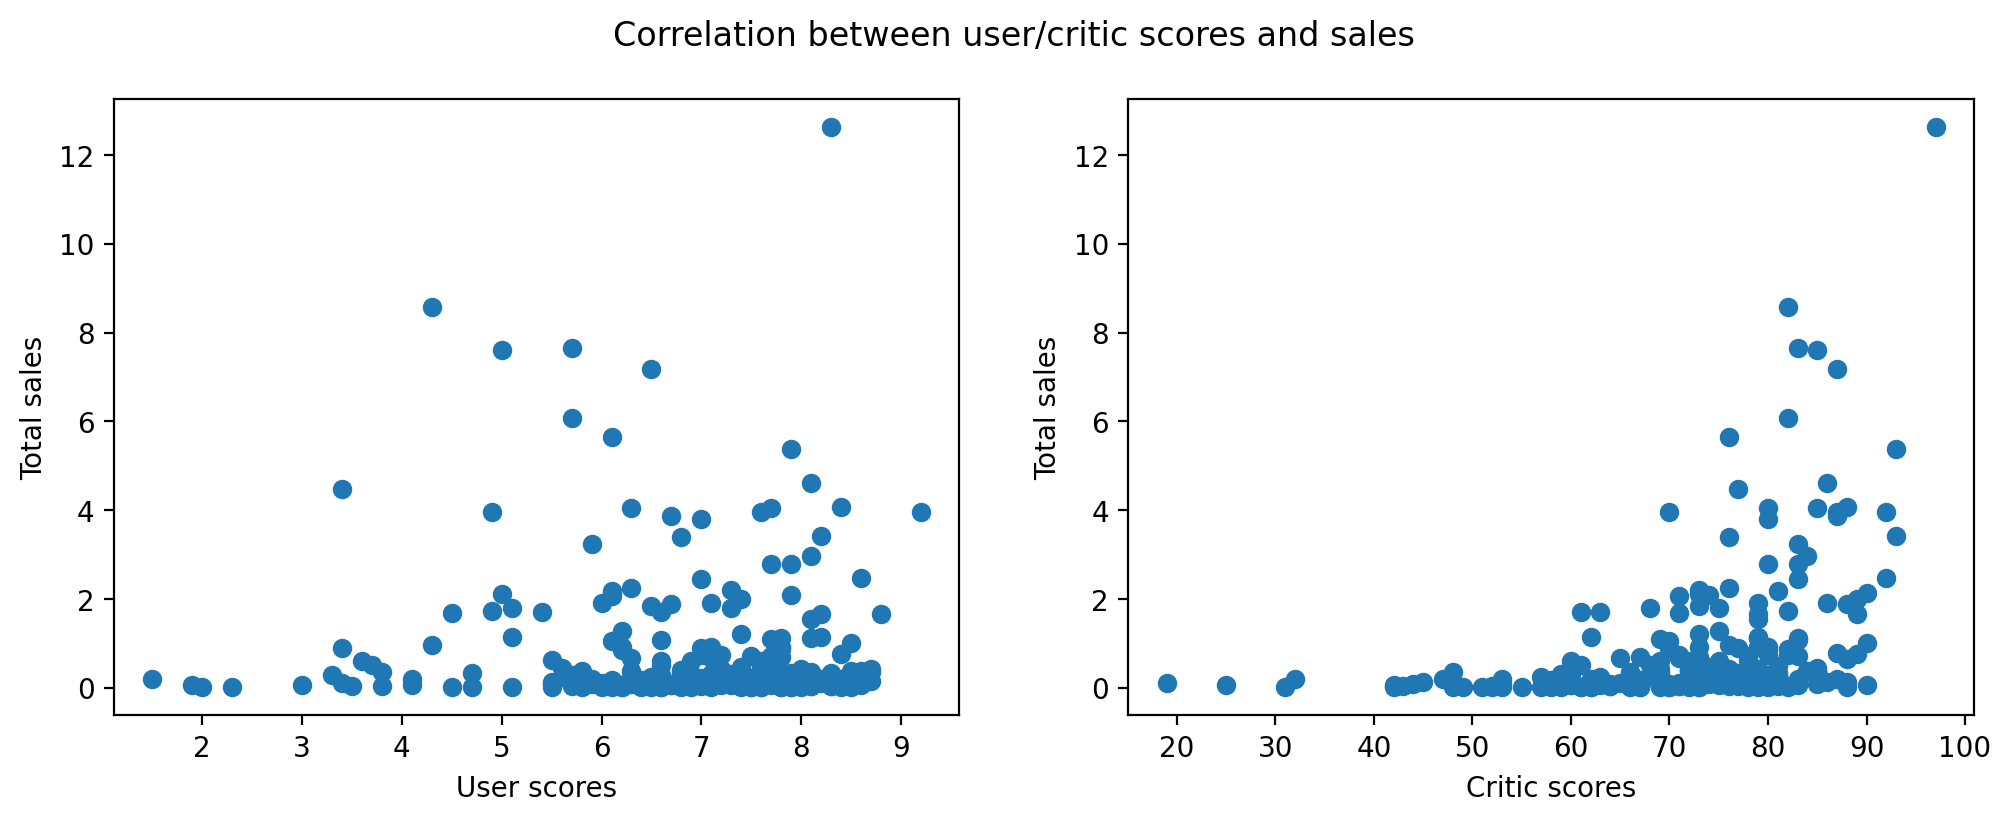

In [87]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].scatter(data.query('platform == "PS4"')['user_score']
            , data.query('platform == "PS4"')['total_sales'])
axs[0].set_xlabel('User scores')
axs[0].set_ylabel('Total sales')

axs[1].scatter(data.query('platform == "PS4"')['critic_score']
            , data.query('platform == "PS4"')['total_sales'])
axs[1].set_xlabel('Critic scores')
axs[1].set_ylabel('Total sales')
fig.suptitle('Correlation between user/critic scores and sales');

There doesn't appear to be any real correlation.

What we can use here is:
- esclude `user_score` from consideration,
- if game has `critic_score` less than 60 - no chances for finantial success.

In [88]:
data.query('platform == "PS4"')['user_score'].corr(data.query('platform == "PS4"')['total_sales'])

-0.040131589472697356

In [89]:
data.query('platform == "PS4"')['critic_score'].corr(data.query('platform == "PS4"')['total_sales'])

0.40266141068104083

QED.  
Let's double-check on other platforms (taking 'XOne', 'WiiU', '3DS').

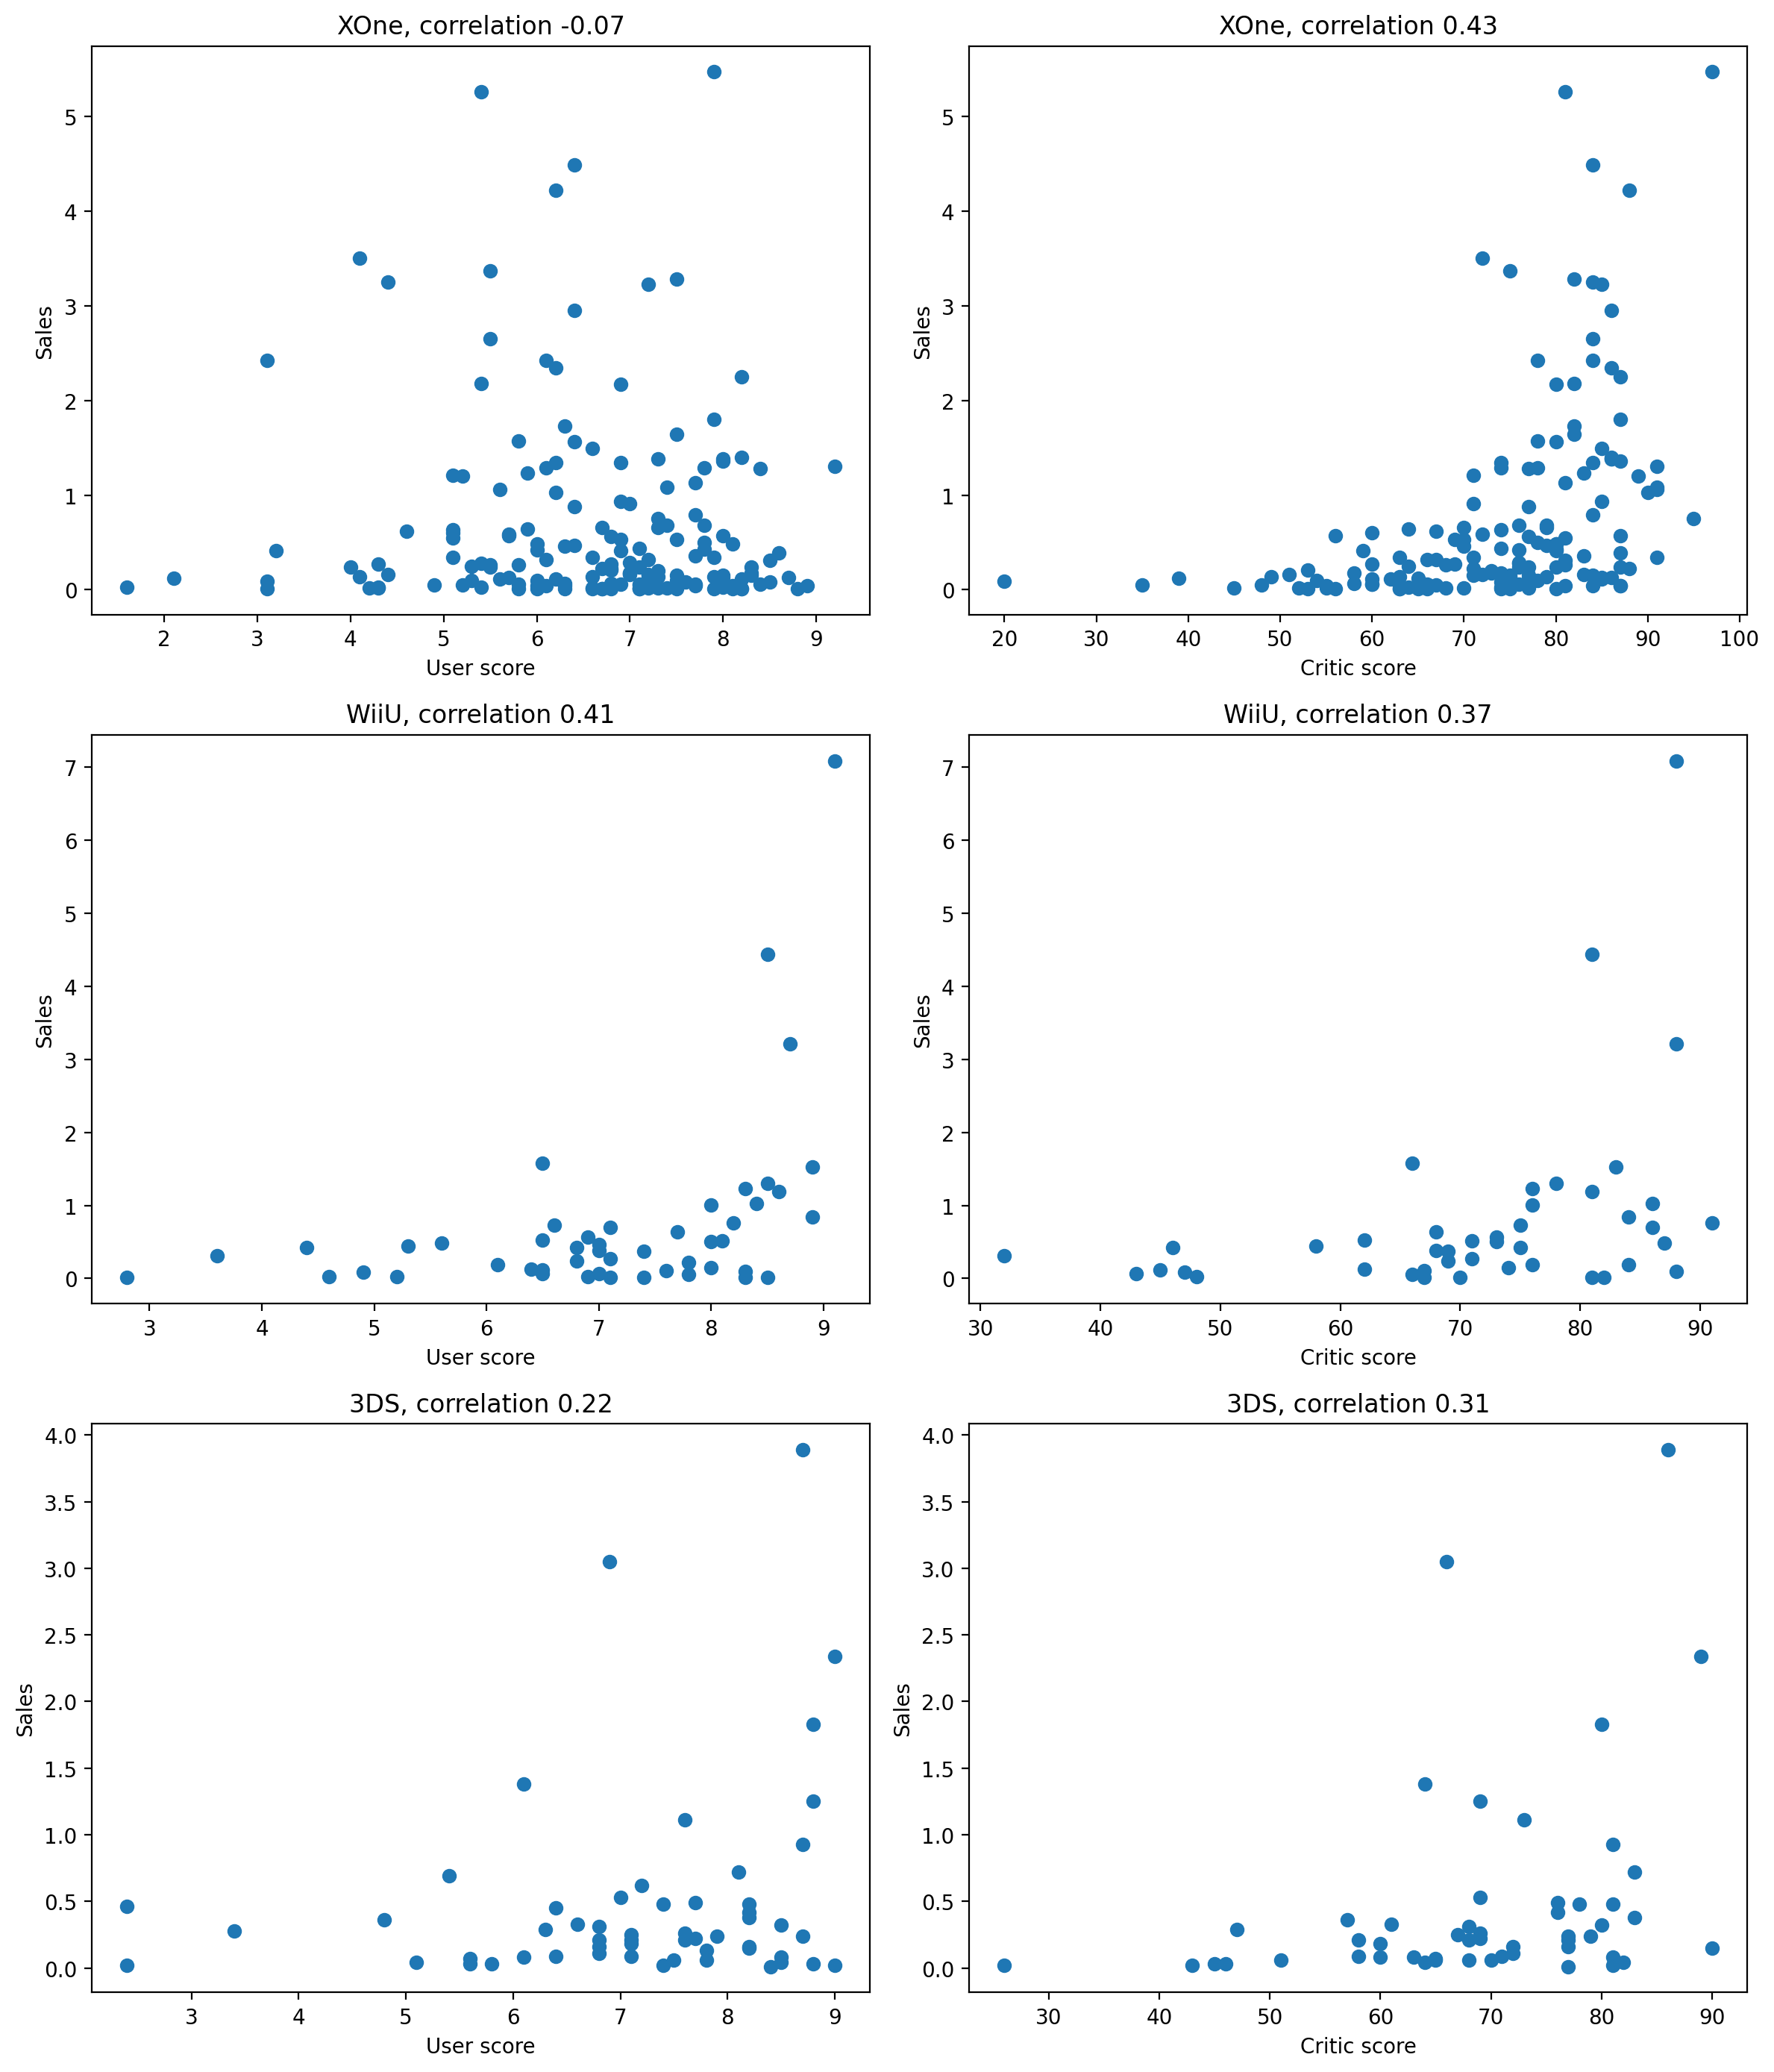

In [90]:
platforms = ['XOne', 'WiiU', '3DS']

fig, axs = plt.subplots(len(platforms), 2, figsize=(12, 14))

for i, item in enumerate(platforms):
    corr = data.query('platform == @item')['user_score'].corr(data.query('platform == @item')['total_sales'])
    axs[i,0].scatter(data.query('platform == @item')['user_score']
                     , data.query('platform == @item')['total_sales']
                    )
    axs[i,0].set_xlabel('User score')
    axs[i,0].set_ylabel('Sales');
    axs[i,0].set_title(f'{item}, correlation {corr:.2f}')

    corr = data.query('platform == @item')['critic_score'].corr(data.query('platform == @item')['total_sales'])
    axs[i,1].scatter(data.query('platform == @item')['critic_score']
                     , data.query('platform == @item')['total_sales']
                    )
    axs[i,1].set_xlabel('Critic score')
    axs[i,1].set_ylabel('Sales');
    axs[i,1].set_title(f'{item}, correlation {corr:.2f}')

plt.tight_layout()

More or less the same result.

### The impact of genre on sales
Let's examine which genres have the highest number of game releases.

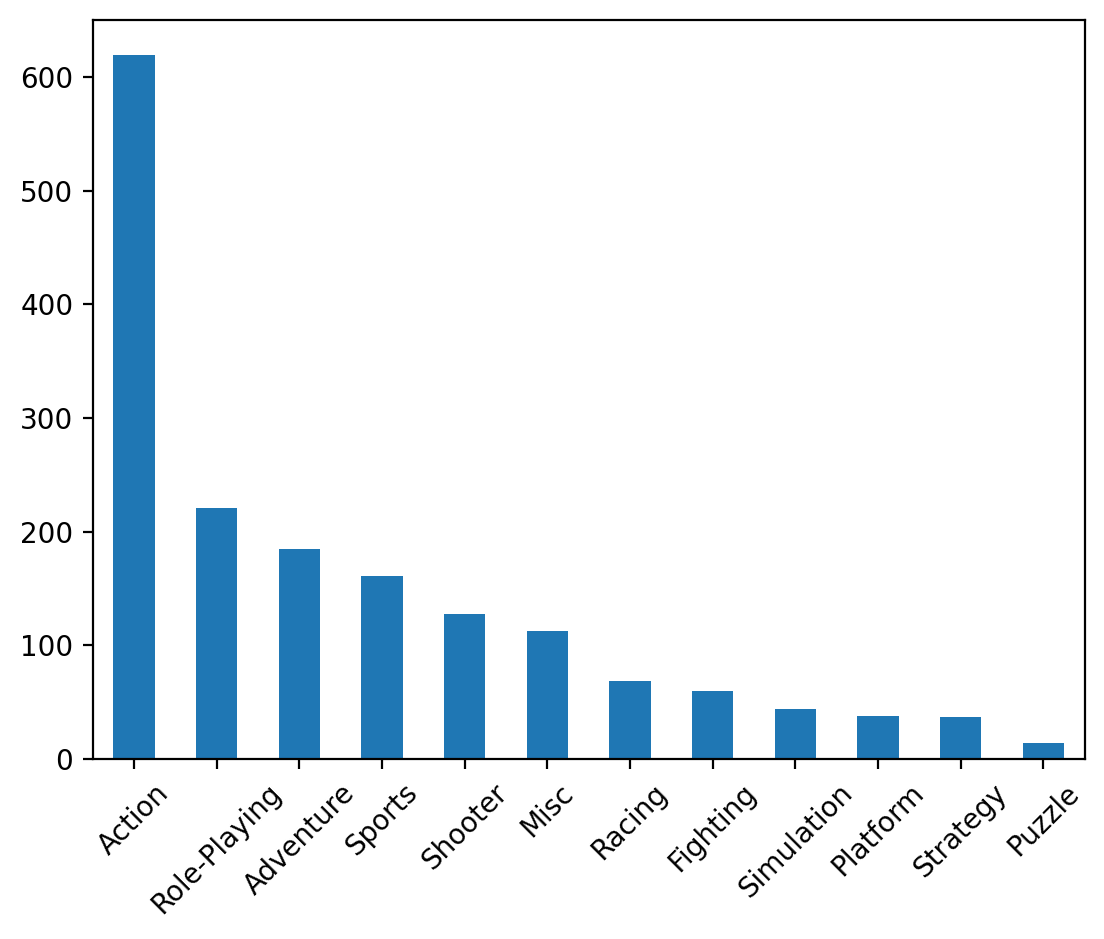

In [91]:
data['genre'].value_counts().plot(kind='bar')
plt.xticks(rotation=45);

'Action' games have the highest number of releases, but what's more important is which genres achieve better sales.

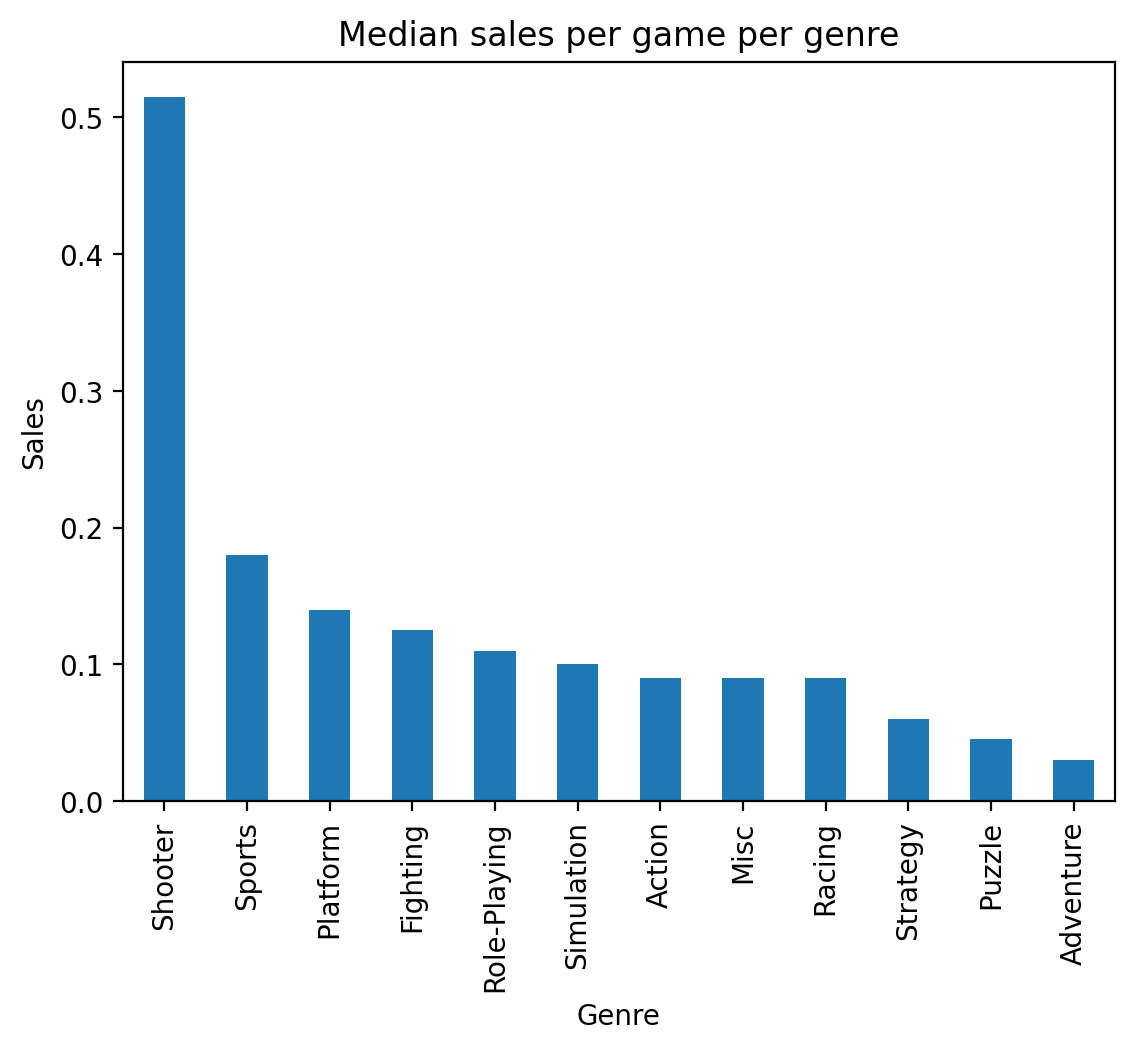

In [92]:
data.groupby('genre')['total_sales'] \
    .median() \
    .sort_values(ascending=False) \
    .plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.title('Median sales per game per genre');

Surprisingly, there are more Action games released though Shooters are better saled. Let's leave the puzzle of this observation to the producers. As resellers, what matters most to us is that:
- sales leaders are: shooter, sports, platform,
- outsiders are: adventure, puzzle, strategy.  

(However, it's worth noting that the performance may also depend on the platform and region.)

### EDA Summary
- The best timeframe for building forecasts is the past 3 years.
- On average, platforms have a lifespan of 7-8 years, so it's not optimal to invest in a games on platform approaching this age.   
- Though the better way to predict the decline of a platform is often not the age but by the appearing of a next-generation platform.
- Currently, the favorites are PS4, XOne, and WiiU (in that order), with Wii and X360 also holding up well, and 3DS deserves attention.
- There is no direct correlation between user and critic reviews and sales on a platform.
- We can confidently say that if critic reviews are less than 60, a game is unlikely to succeed, but if they are higher, there is probability.
- The genre with the highest financial success is Shooter, followed by Sports, Racing, and Platform, although success in these genres may depend on the platform. Puzzle, Strategy, and Adventure are the underperformers.

## User portrait by region
Examining the geographic origins and distribution of customers.

In [93]:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
data[regions].sum()

na_sales      284.06
eu_sales      270.68
jp_sales       93.09
other_sales    81.62
dtype: float64

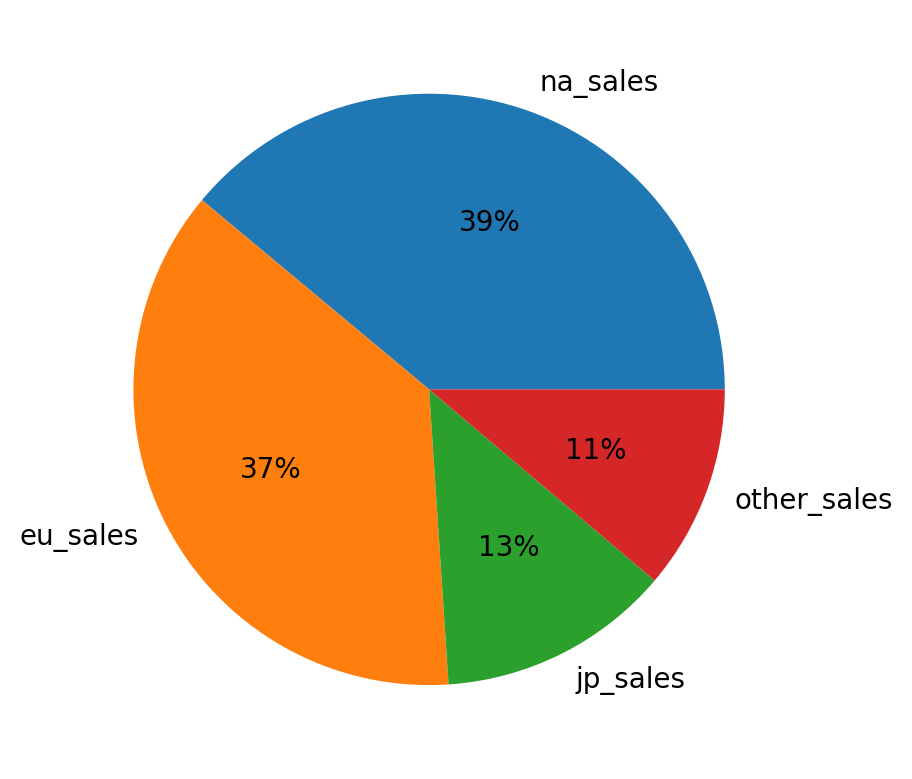

In [94]:
(data[regions].sum() / data['total_sales'].sum()).plot(kind='pie', autopct = '%1.0f%%')
plt.ylabel('');

### Top5 platforms by region.

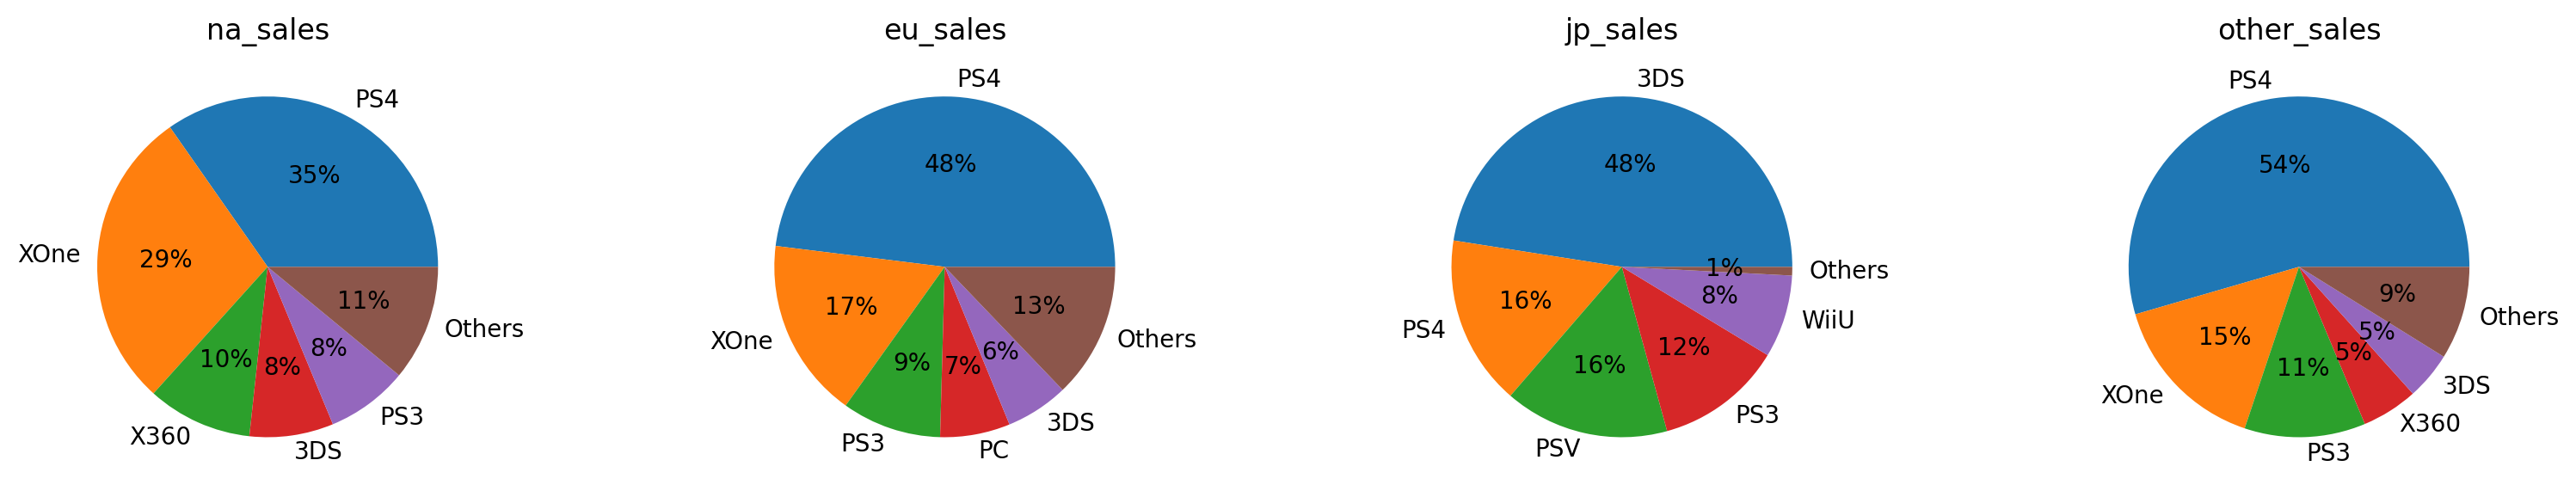

In [95]:
top5 = data.groupby('platform')[regions].sum()
fig, axs = plt.subplots(1, 4, figsize=(16, 3))

#cycle to build separate pie for each reagion
for i, item in enumerate(regions):

    #gathering all platforms outside of top5 to category 'other'
    top = top5[item].sort_values(ascending=False)[:5]
    others = pd.Series(top5[item].sort_values(ascending=False)[5:].sum(), index=['Others'])
    result = pd.concat([top, others])

    #building plot
    ax = result.plot(kind='pie', autopct = '%1.0f%%', ax=axs[i])
    ax.set_ylabel('')
    ax.set_title(item);

plt.tight_layout()

Everyone has fairly similar preferences, with the exception of japaneese audience.  

Regarding minor differences:
- In Europe, there is a preference for PC over X360.
- In North America, the market share between PS4 and XOne is more evenly balanced.

### Top5 genres by region.

Let's examine distribution for genres while taking the median sales per game.

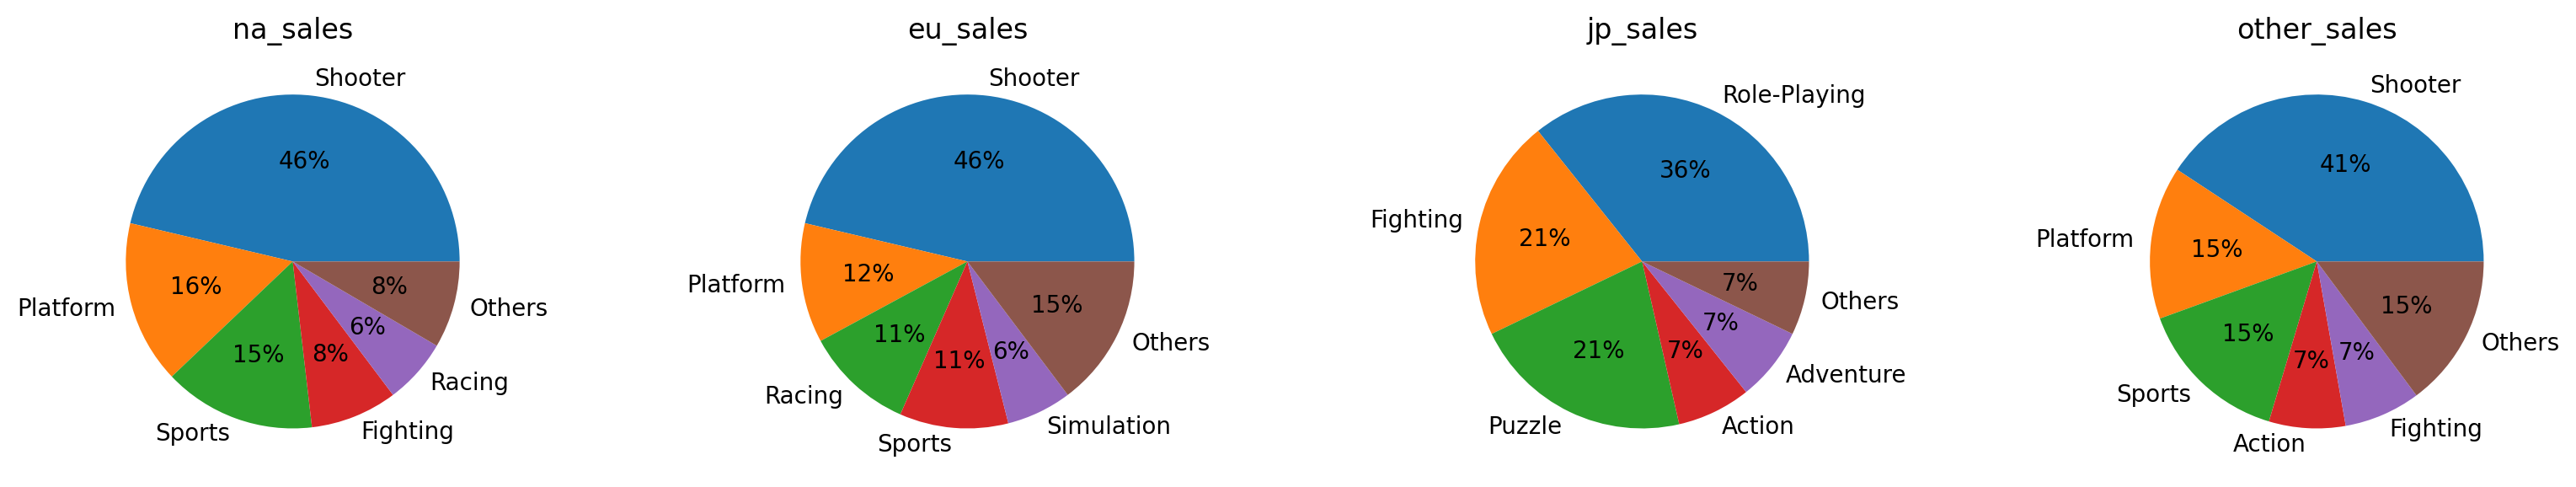

In [96]:
top5 = data.groupby('genre')[regions].median()

fig, axs = plt.subplots(1, 4, figsize=(16, 3))

for i, item in enumerate(regions):
    #gathering all genres outside of top5 to category 'other'
    top = top5[item].sort_values(ascending=False)[:5]
    others = pd.Series(top5[item].sort_values(ascending=False)[5:].sum(), index=['Others'])
    result = pd.concat([top, others])

    ax = result.plot(kind='pie', autopct = '%1.0f%%', ax=axs[i], normalize=True)
    ax.set_ylabel('')
    ax.set_title(item);

plt.tight_layout()

Tends to buy shooters more willingly everyone who is not japaneese.

### Impact of ESRB rating sales in different regions.
Let's fill in NaN with some random word - 'None' will work.

In [97]:
data['rating'].fillna('None', inplace=True)

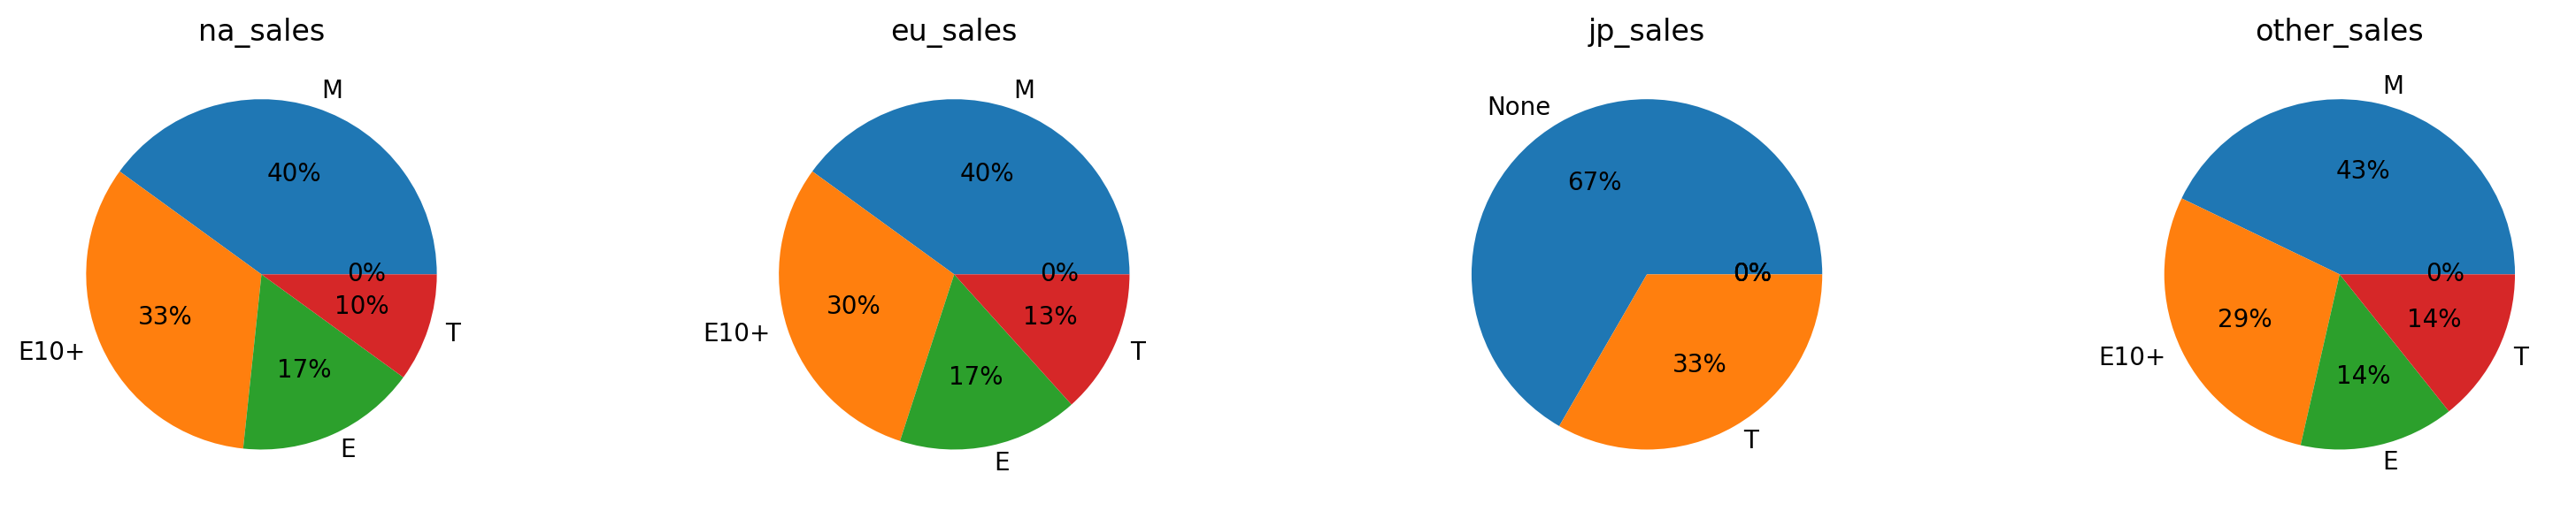

In [98]:
top5 = data.groupby('rating')[regions].median()

fig, axs = plt.subplots(1, 4, figsize=(16, 3))

for i, item in enumerate(regions):
    ax = top5[item].sort_values(ascending=False)[:5].plot(kind='pie', autopct = '%1.0f%%', ax=axs[i], normalize=True)
    ax.set_ylabel('')
    ax.set_title(item);

plt.tight_layout()

As expected, M-rated games have the highest sales, as it is the largest and most mature audience. E10+ games come in second place, while T-rated games are the least popular.

As is often the case, the Japanese market deviates from the norm. Google says, they have their own rating system called CERO. Given this, the fact that T-rated games still take 33% of sales in Japan may suggest that Japanese teenagers are increasingly interested in games that are popular in North America and Europe. This is an interesting observation to note.


### Section Summary
- The largest market is North America, followed by Europe (approximately equal, each around 40%), with Japan and Other regions sharing smaller parts, roughly equal, each around 10%.
- Platforms: for the global market, excluding Japan, the top are PS4 and XOne, while in Japan it's 3DS.
- Genres: similarly, in most regions except Japan, the most popular genres are shooting, platform, and sports, while the less popular ones are strategy and puzzle. In Japan, the most popular genres are role-playing and fighting.
- ESRB Ratings: Adult games (M rating) sell the best, followed by E10+, while teen-rated games perform less favorably (except, of course, in Japan).

## Overall project summary

### Data required minimal preprocessing
- Column names were corrected to lowercase for convenience.
- In the `user_score` column, the placeholder 'tbd' was replaced with np.nan.
- The data type of the `user_score` was changed from object to float, and `year_of_release` was changed from float to int16.
- 269 rows with missing values in the `year_of_release` column were removed.
- 2 rows with games that had unknown names and genres were deleted.
- Missing values were retained in the `critic_score`, `user_score`, and `rating` columns, with the final dataset containing 971 missing values in `critic_score`, 801 in `user_score`, and 749 in `rating`.
- 1 duplicate was removed.
- A new column, total_sales, was created to represent total sales.


> The raw data contained **16715** records of **11599** unique games spanning **30+** years.    
> For the final analysis, approximately **10%** of the data was retained, consisting of **1689** records of **956** unique games over **3** years.   
> This significant reduction in the dataset is justified by the need for maximum accuracy in forecasting, as the gaming industry experiences rapid and substantial changes.



   
    
    

### EDA Summary
- The average lifespan of gaming platforms has been determined to be 7-8 years.
- However, a potentially more accurate indicator of a platform's decline could be the emergence of the next generation of that platform in the market.
- The best timefrom for forcasting analysis is 3 years.
- Currently the most promising platforms in the American, European, and other markets are PS4 and XOne, while in the Japanese market, it's 3DS.
- There is no direct correlation between user reviews and sales.
- Regarding critic reviews, it can be confidently stated that games with ratings below 60 (out of 100) are unlikely to become popular (games with ratings above 60 provide no guarantees, but they at least have a chance).
- Genres with the highest financial success in the American, European, and other markets are shooter, sports, and platform (in that order), while in Japan, it's role-playing and fighting.
- The least popular genres are strategy, puzzle, and adventure.
- If we consider ESRB ratings, adult games (M rating) are the best-selling, followed by E10+, while teenagers games perform the least favorably (except in Japan, of course).

### Finantial success forcasing recommendations

To increase the probability of financial success for a game, it should ideally meet multiple criteria from the following:

- Being released on a platform with above-average sales per game during the period (e.g., in 2014-2016, this includes PS4 and XOne).
- Receiving a critic score greater than 60.
- Belonging to one of the popular genres among buyers: in 2014-2016 these are shooter, sports, platform.
- Having an age rating of M.

### Verifying the conclusions.

Since we don't have data on sales for each individual year, it is challenging to verify whether the specified criteria will accurately predict a game's financial success for the next year. However, let's attempt a small experiment using the available data.

We will gather a sample of games that meet the recommended cryteria, with a sufficient sample size, to test the hypothesis. We will then check whether such games were financially more successful during the specified period compared to games that do not meet cryteria during the same period.

In [99]:
#the sample with games that meet cryteria
sample = data.query('platform in ["PS4", "XOne"] \
           and critic_score > 60 \
           and genre == "Shooter" \
           and rating == "M"')['total_sales']

#the sample with games that do not meet cryteria on the same period
control_sample = data.query('platform not in ["PS4", "XOne"] \
           and critic_score <= 60 \
           and genre != "Shooter" \
           and rating != "M"')['total_sales']

#verifying we have > 30 values by the sample
display(sample.shape[0])
control_sample.shape[0]

39

31

**Null Hypothesis:** The average sales of games from popular platforms, with high critic scores, in the shooter genre for adults for the years 2014-2016 are equal to the average sales of games that do not meet these cryteria for the same period.  
**Alternative Hypothesis:** The average sales of games meeting the criteria we've specified are higher than the average sales of games not meeting (for the period 2014-2016).

Let's take alpha of 0.05.

In [100]:
st.ttest_ind(control_sample
             , sample
             , equal_var=False
             , alternative='less').pvalue

5.444536485577751e-07

The significantly lower pvalue indicates that we reject the null hypothesis in favor of the alternative hypothesis.  
This suggests that the average of the population meeting our specified criteria is higher than the average of population not meeting.  
In other words, we conclude that the specified criteria are linked to higher sales in the population of interest.

In summary, this means that the criteria are effective.